In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Resources

[OpenEI dataset](https://openei.org/doe-opendata/dataset/1be0a37f-28e5-4021-84bb-39a643250102/resource/bbeccdf5-301e-4390-b503-7d9f8d404986/download/wind50mresourcearea.xlsx)  
[DTU wind atlas](https://globalwindatlas.info/)

### Onshore

In [2]:
windpath='http://en.openei.org/doe-opendata/dataset/c186913f-6684-4455-a2f2-f26e152a9b35/resource/4dc4a6fd-3a63-47df-bcbe-e9c83b83b38e/download/nrelcfddawindsc20130603.xlsx'

In [3]:
wind=pd.read_excel(windpath,sheet_name='Onshore Power',skiprows=2)
#http://en.openei.org/doe-opendata/dataset/c186913f-6684-4455-a2f2-f26e152a9b35/resource/4dc4a6fd-3a63-47df-bcbe-e9c83b83b38e/download/nrelcfddawindsc20130603.xlsx
wind_cap={}
for i in wind.T.iteritems():
    country=i[1][0]
    for k in range(1,10):
        if country not in wind_cap:wind_cap[country]={}
        clas=k
        cap=i[1][k] + i[1][k+10]# + i[1][k+20] #last one too far 0-50,50-100,100-5000
        wind_cap[country][clas]=cap/1000.0 #workbook reported values in GW, we use TW

In [4]:
wind=pd.read_excel(windpath,sheet_name='Onshore Energy',skiprows=2)
#http://en.openei.org/doe-opendata/dataset/c186913f-6684-4455-a2f2-f26e152a9b35/resource/4dc4a6fd-3a63-47df-bcbe-e9c83b83b38e/download/nrelcfddawindsc20130603.xlsx
wind_res={}
for i in wind.T.iteritems():
    country=i[1][0]
    for k in range(1,10):
        if country not in wind_res:wind_res[country]={}
        clas=k
        cap=i[1][k] + i[1][k+10]# + i[1][k+20] #last one too far 0-50,50-100,100-5000
        wind_res[country][clas]=cap*1000.0 #workbook reported values in PWh, we use TWh

Power

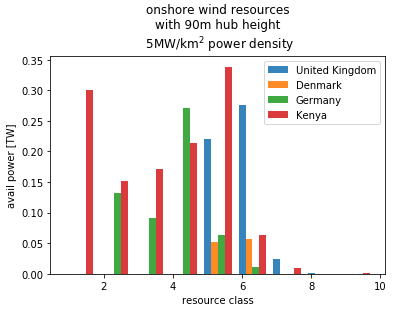

In [5]:
countries=['United Kingdom','Denmark','Germany','Kenya']
for i,country in enumerate(countries):
    plt.bar(np.array(list(wind_cap[country].keys()))+0.2*i,
            wind_cap[country].values(),alpha=0.9,width=0.2,label=country)
plt.ylabel('avail power [TW]')
plt.title('onshore wind resources\nwith 90m hub height\n 5MW/km$^2$ power density')
plt.xlabel('resource class')
plt.legend();

Capacity Factors

In [6]:
cf=pd.read_excel(windpath,sheet_name='General',skiprows=1)
cf=cf[['Wind Classes','Capacity Factor']][:9]
cf

,Wind Classes,Capacity Factor
0,c1,0-0.18
1,c2,0.18-0.22
2,c3,0.22-0.26
3,c4,0.26-0.3
4,c5,0.3-0.34
5,c6,0.34-0.38
6,c7,0.38-0.42
7,c8,0.42-0.46
8,c9,0.46-1.0


Energy

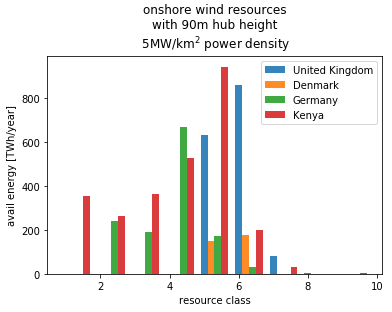

In [7]:
countries=['United Kingdom','Denmark','Germany','Kenya']
for i,country in enumerate(countries):
    plt.bar(np.array(list(wind_res[country].keys()))+0.2*i,
            wind_res[country].values(),alpha=0.9,width=0.2,label=country)
plt.ylabel('avail energy [TWh/year]')
plt.title('onshore wind resources\nwith 90m hub height\n 5MW/km$^2$ power density')
plt.xlabel('resource class')
plt.legend();

In [8]:
#!pip install plotly

Intall `plotly` if you haven't before.  
Then configure credentials at `~/.plotly/.credentials`.  
Create user and get API key from https://plot.ly/settings/api#/

In [10]:
import plotly.plotly as py
import plotly.tools as tls

mpl_fig = plt.figure(figsize=(9,5))
ax = mpl_fig.add_subplot(111)
x=np.array(list(wind_res[countries[0]].keys()))
    
for i,country in enumerate(countries):
    y=wind_res[country].values()
    ax.bar(x,y,width=0.8)
ax.set_ylabel('Available energy [TWh/year]')
ax.set_xlabel('Resource class')
ax.set_title('Onshore wind resources')
plotly_fig = tls.mpl_to_plotly(mpl_fig)
for i,e in enumerate(plotly_fig['data']):
    e['name']=countries[i]
plotly_fig["layout"]["showlegend"] = True
plotly_fig["layout"]['hovermode']='x'
py.iplot(plotly_fig, filename='ons1')

### Offshore

Power

In [14]:
wind=pd.read_excel(windpath,sheet_name='Offshore Power',skiprows=3)
wind_cap2={}
country=''
for i in wind.T.iteritems():
    if str(i[1][0])!='nan':
        country=str(i[1][0])
    water=str(i[1][1])
    if water in {'shallow','transitional'}: #skip deep for now
        for k in range(2,11):
            if country not in wind_cap2:wind_cap2[country]={}
            clas=k-1
            cap=i[1][k] + i[1][k+10]# + i[1][k+20] #last one too far 0-50,50-100,100-5000
            if clas not in wind_cap2[country]:wind_cap2[country][clas]=0
            wind_cap2[country][clas]+=cap/1000.0

In [15]:
countries=['United Kingdom','Denmark','Germany','Chile']
mpl_fig = plt.figure(figsize=(9,6))
ax = mpl_fig.add_subplot(111)
x=np.array(list(wind_cap2[countries[0]].keys()))
    
for i,country in enumerate(countries):
    y=wind_cap2[country].values()
    ax.bar(x,y,width=0.8)
ax.set_ylabel('Available power [TW]')
ax.set_xlabel('Resource class')
ax.set_title('Offshore wind resources')
plotly_fig = tls.mpl_to_plotly(mpl_fig)
for i,e in enumerate(plotly_fig['data']):
    e['name']=countries[i]
plotly_fig["layout"]["showlegend"] = True
plotly_fig["layout"]['hovermode']='x'
py.iplot(plotly_fig, filename='ofs1')

Energy

In [16]:
wind=pd.read_excel(windpath,sheet_name='Offshore Energy',skiprows=3)
wind_res2={}
country=''
for i in wind.T.iteritems():
    if str(i[1][0])!='nan':
        country=str(i[1][0])
    water=str(i[1][1])
    if water in {'shallow','transitional'}: #skip deep for now
        for k in range(2,11):
            if country not in wind_res2:wind_res2[country]={}
            clas=k-1
            cap=i[1][k] + i[1][k+10]# + i[1][k+20] #last one too far 0-50,50-100,100-5000
            if clas not in wind_res2[country]:wind_res2[country][clas]=0
            wind_res2[country][clas]+=cap*1000.0

In [17]:
mpl_fig = plt.figure(figsize=(9,6))
ax = mpl_fig.add_subplot(111)
x=np.array(list(wind_res2[countries[0]].keys()))
    
for i,country in enumerate(countries):
    y=wind_res2[country].values()
    ax.bar(x,y,width=0.8)
ax.set_ylabel('Available energy [TWh/year]')
ax.set_xlabel('Resource class')
ax.set_title('Offshore wind resources')
plotly_fig = tls.mpl_to_plotly(mpl_fig)
for i,e in enumerate(plotly_fig['data']):
    e['name']=countries[i]
plotly_fig["layout"]["showlegend"] = True
plotly_fig["layout"]['hovermode']='x'
py.iplot(plotly_fig, filename='ofs2')

### Convert wind classes to *m/s* speeds

https://www.nrel.gov/gis/data-wind.html

In [18]:
df=pd.read_html('https://www.nrel.gov/gis/data-wind.html')[0]

In [19]:
df=df[1::2].reset_index()

In [20]:
df2=df.copy()
df2.columns=df2.loc[0]
df=df[1:]

In [21]:
df2[1:]

,1,Wind Power Density (W/m2),Speedb m/s (mph),Wind Power Density (W/m2),Speedb m/s (mph),nan
1,3,100,4.4 (9.8),200,5.6 (12.5),NaN
2,5,150,5.1 (11.5),300,6.4 (14.3),NaN
3,7,200,5.6 (12.5),400,7.0 (15.7),NaN
4,9,250,6.0 (13.4),500,7.5 (16.8),NaN
5,11,300,6.4 (14.3),600,8.0 (17.9),NaN
6,13,400,7.0 (15.7),800,8.8 (19.7),NaN
7,15,1000,9.4 (21.1),2000,11.9 (26.6),NaN


In [22]:
classes=list(df.index) #extract classes

In [23]:
x10m=np.array([float(i[:i.find(' ')]) for i in df[1]]) #wind speed at 10m hub height
x50m=np.array([float(i[:i.find(' ')]) for i in df[3]]) #wind speed at 50m hub height

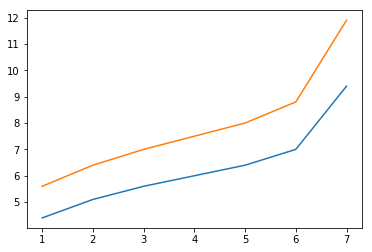

In [24]:
plt.plot(classes,x10m)
plt.plot(classes,x50m)

http://windpower.generatorguide.net/wind-speed-power.html

In [25]:
def height_converter(h,href,vref):
    return vref*(h*1.0/href)**(1/7)

In [26]:
x90m1=height_converter(90,10,x10m)
x90m2=height_converter(90,50,x50m)
x90m=(x90m1+x90m2)/2.0

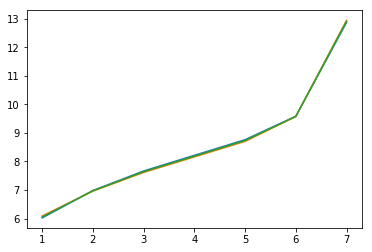

In [27]:
plt.plot(classes,x90m1)
plt.plot(classes,x90m2)
plt.plot(classes,x90m)

Cast the NREL 7 classes into the map's 9 classes.

In [28]:
x90m9cl=np.array(list(x90m[:-1])+[x90m[-2]+(x90m[-1]-x90m[-2])*1/3,
                                  x90m[-2]+(x90m[-1]-x90m[-2])*2/3,
                                  x90m[-1]])

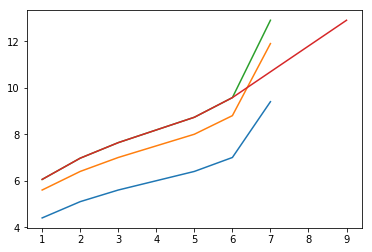

In [29]:
plt.plot(classes,x10m)
plt.plot(classes,x50m)
plt.plot(classes,x90m)
plt.plot(classes+[8,9],x90m9cl)

In [30]:
class2speed={i+1:np.round(x90m9cl[i],1) for i in range(len(x90m9cl))}

New plot with speeds

In [31]:
countries=['United Kingdom','Denmark','Germany','Chile']
mpl_fig = plt.figure(figsize=(9,6))
ax = mpl_fig.add_subplot(111)
x=[class2speed[i] for i in wind_res[countries[0]].keys()]
    
for i,country in enumerate(countries):
    y=wind_res[country].values()
    ax.bar(x,y,width=0.8)
ax.set_ylabel('Available energy (TWh/year)')
ax.set_xlabel('Wind speed (m/s)')
ax.set_title('Onshore wind resources')
plotly_fig = tls.mpl_to_plotly(mpl_fig)
for i,e in enumerate(plotly_fig['data']):
    e['name']=countries[i]
plotly_fig["layout"]["showlegend"] = True
plotly_fig["layout"]['hovermode']='x'
py.iplot(plotly_fig, filename='ons3')

In [32]:
mpl_fig = plt.figure(figsize=(9,6))
ax = mpl_fig.add_subplot(111)
x=[class2speed[i] for i in wind_res2[countries[0]].keys()]
    
for i,country in enumerate(countries):
    y=wind_res2[country].values()
    ax.bar(x,y,width=0.8)
ax.set_ylabel('Available energy (TWh/year)')
ax.set_xlabel('Wind speed (m/s)')
ax.set_title('Offshore wind resources')
plotly_fig = tls.mpl_to_plotly(mpl_fig)
for i,e in enumerate(plotly_fig['data']):
    e['name']=countries[i]
plotly_fig["layout"]["showlegend"] = True
plotly_fig["layout"]['hovermode']='x'
py.iplot(plotly_fig, filename='ofs3')

## Turbines

In [33]:
df=pd.read_excel('data/wind_farms_with_ws_2k_5k_sgouris edited.xlsx',sheet_name='BASE')
df=df.dropna()
turbines=df.set_index(['ISO_CODE','Year'])

In [34]:
turbines.head()

ID OFFSHORE POWER_KW   WS_est
ISO_CODE Year                                 
FR       2003.0   1       no    12000  8.55312
         2003.0   2       no     7500  8.58871
         2005.0   5       no    11900  8.30861
         2002.0   6       no     8000  6.72163
         2002.0   7       no     1500  6.72163

### Onshore

In [35]:
def projects(df,c):
    x=[]
    y=[]
    z=[]
    for i in df.loc[c].sort_index().index.unique():
        x.append(i)
        dz=df.loc[c].loc[[k for k in df.loc[c].index.unique() if k<=i]]
        y.append(np.average(dz['WS_est'].astype(float).values))
        try:
            z.append(np.average(dz['WS_est'],weights=dz['POWER_KW'].astype(float).values))
        except:
            z.append(np.average(dz['WS_est']))
    return x,y,z

In [36]:
df=turbines[((turbines['POWER_KW'].replace('#ND',0).astype(int)>0)&\
       (turbines['POWER_KW'].replace('#ND',0).astype(int)<1000000)&(turbines['OFFSHORE']=='no'))]
countries=[{'BR','AR','GB','CA','US','IN'},{'FR','DE','CN','IT','ES','GB'}]


fig, ax = plt.subplots(1,2,figsize=(9,5))
for s in range(len(countries)):
    for c in countries[s]:
        x,y,z=projects(df,c)
        ax[s].plot(x,z,label=c)

    ax[s].set_ylabel('Capacity weighted mean windspeed [m/s]')
    ax[s].set_title("Onshore turbines | Cumulative")

plotly_fig = tls.mpl_to_plotly(fig)
plotly_fig["layout"]["showlegend"] = True
plotly_fig["layout"]['hovermode']='x'
py.iplot(plotly_fig, filename='ons4')

### Offshore

In [37]:
df=turbines[((turbines['POWER_KW'].replace('#ND',0).astype(int)>0)&\
       (turbines['POWER_KW'].replace('#ND',0).astype(int)<1000000)&(turbines['OFFSHORE']=='yes'))]
countries=[{'GB','US','IN','CN','FR','DE'},{'GB'}]


fig, ax = plt.subplots(1,2,figsize=(9,5))
for s in range(len(countries)):
    for c in countries[s]:
        x,y,z=projects(df,c)
        ax[s].plot(x,z,label=c)

    ax[s].set_ylabel('Capacity weighted mean windspeed [m/s]')
    ax[s].set_title("Onshore turbines | Cumulative")

plotly_fig = tls.mpl_to_plotly(fig)
plotly_fig["layout"]["showlegend"] = True
plotly_fig["layout"]['hovermode']='x'
py.iplot(plotly_fig, filename='ofs4')

Compare turbines with resources

In [163]:
df=turbines[((turbines['POWER_KW'].replace('#ND',0).astype(int)>0)&\
       (turbines['POWER_KW'].replace('#ND',0).astype(int)<1000000)&(turbines['OFFSHORE']=='no'))]

In [164]:
cs=['GB','DE','FR']
c2s=['United Kingdom','Germany','France']
#generate nice colorscale: http://paletton.com
colors=['#AA5585','#499272','#D4CB6A']
smoothing=0.5,0.2
fig = tools.make_subplots(rows=1, cols=2, shared_yaxes=True);
for i in range(len(cs)):
    c=cs[i]
    c2=c2s[i]
    x,y,z=projects(df,c)
    x2=[class2speed[i] for i in wind_res[c2].keys()]
    y2=np.array(list(wind_res[c2].values()))
    fig.append_trace(
        go.Scatter(x=y2,y=x2,
            mode = 'lines',
            fill='toself',
            legendgroup= c2,
            name = c2,
            line=dict(
                color=colors[i],
                shape='spline',
                smoothing=smoothing[1]
            )
        ),1,1
    )
    fig.append_trace(
        go.Scatter(x=x,y=z,
            mode = 'lines',
            name = c2,  
            legendgroup= c2,
            line=dict(
                color=colors[i],
                shape='spline',
                smoothing=smoothing[0]
            ),
            showlegend=False
        ),1,2
    )
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.3],
        title='Available power (TW)',
        autorange='reversed'
    ),
    xaxis2=dict(
        domain=[0.3, 1],
        title='Year'
    ),
    yaxis=dict(
        title='Wind speed (m/s)'
    ),
    yaxis2=dict(
        anchor='x2',
    ),
    title='Onshore wind turbine projects and available power by wind speed'
)
fig["layout"]=layout
fig["layout"]["showlegend"] = True
fig["layout"]['hovermode']='x'
py.iplot(fig, filename='ons5')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y1 ]



In [165]:
df=turbines[((turbines['POWER_KW'].replace('#ND',0).astype(int)>0)&\
       (turbines['POWER_KW'].replace('#ND',0).astype(int)<1000000)&(turbines['OFFSHORE']=='yes'))]

In [166]:
fig = tools.make_subplots(rows=1, cols=2, shared_yaxes=True);
for i in range(len(cs)):
    c=cs[i]
    c2=c2s[i]
    x,y,z=projects(df,c)
    x2=[class2speed[i] for i in wind_res2[c2].keys()]
    y2=np.array(list(wind_res2[c2].values()))
    fig.append_trace(
        go.Scatter(x=y2,y=x2,
            mode = 'lines',
            fill='toself',
            legendgroup= c2,
            name = c2,
            line=dict(
                color=colors[i],
                shape='spline',
                smoothing=smoothing[1]
            )
        ),1,1
    )
    fig.append_trace(
        go.Scatter(x=x,y=z,
            mode = 'lines',
            name = c2,  
            legendgroup= c2,
            line=dict(
                color=colors[i],
                shape='spline',
                smoothing=smoothing[0]
            ),
            showlegend=False
        ),1,2
    )
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.3],
        title='Available power (TW)',
        autorange='reversed'
    ),
    xaxis2=dict(
        domain=[0.3, 1],
        title='Year'
    ),
    yaxis=dict(
        title='Wind speed (m/s)'
    ),
    yaxis2=dict(
        anchor='x2',
    ),
    title='Offshore wind turbine projects and available power by wind speed'
)
fig["layout"]=layout
fig["layout"]["showlegend"] = True
fig["layout"]['hovermode']='x'
py.iplot(fig, filename='ofs5')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y1 ]



In [170]:
fig = tools.make_subplots(rows=1, cols=2, shared_yaxes=True);
for i in range(len(cs)):
    c=cs[i]
    c2=c2s[i]
    x,y,z=projects(df,c)
    x2=[class2speed[i] for i in wind_res2[c2].keys()]
    y2=np.array(list(wind_res2[c2].values()))
    fig.append_trace(
        go.Bar(x=y2,y=x2,
            legendgroup= c2,
            name = c2,
            orientation='h'
        ),1,1
    )
    fig.append_trace(
        go.Scatter(x=x,y=z,
            mode = 'lines',
            name = c2,  
            legendgroup= c2,
            line=dict(
                color=colors[i],
                shape='spline',
                smoothing=smoothing[0]
            ),
            showlegend=False
        ),1,2
    )
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.3],
        title='Available power (TW)',
        autorange='reversed'
    ),
    xaxis2=dict(
        domain=[0.3, 1],
        title='Year'
    ),
    yaxis=dict(
        title='Wind speed (m/s)'
    ),
    yaxis2=dict(
        anchor='x2',
    ),
    title='Offshore wind turbine projects and available power by wind speed'
)
fig["layout"]=layout
fig["layout"]["showlegend"] = True
fig["layout"]['hovermode']='x'
py.iplot(fig, filename='ofs5')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y1 ]



PlotlyRequestError: Hi there, you've reached the threshold of 100 combined image exports and chart saves per 24h period. If you need to raise your daily limit, please consider upgrading to a paid plan
(see: https://plot.ly/products/cloud ).

Select countries to conisder (those with 50 projects at least) to further data collection